In [194]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
df = pd.read_csv(r'/content/drive/My Drive/ML Project/Parkinsons Diseases/parkinsons.data')

features = df.iloc[ : , df.columns != 'status'].values[ : , 1: ]
labels = df.iloc[ : ,df.columns == 'status'].values

In [200]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x = sc_X.fit_transform(features)
y = labels

In [82]:
'''
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = labels '''

'\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler((-1,1))\nx = scaler.fit_transform(features)\ny = labels '

In [201]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

### XGB

In [202]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier()
modelXGB.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [203]:
from sklearn import metrics

y_predXGB = modelXGB.predict(x_test)
accuracyXGB = metrics.accuracy_score(y_test, y_predXGB)*100
print("Accuracy in XGB Classifier : %.2f" % accuracyXGB)

Accuracy in XGB Classifier : 94.87


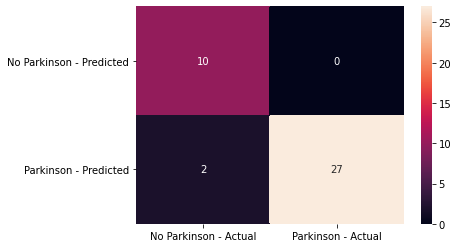

In [205]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_XGB = confusion_matrix(y_test, y_predXGB)

xAxisLabels = ['No Parkinson - Actual', 'Parkinson - Actual']
yAxisLabels = ['No Parkinson - Predicted', 'Parkinson - Predicted']

ss.heatmap(confusionMatrix_XGB, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

### GNB

In [206]:
from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB()
modelGNB.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [207]:
y_predGNB = modelGNB.predict(x_test)
accuracyGNB = metrics.accuracy_score(y_test, y_predGNB)*100
print("Accuracy in GNB Classifier : %.2f" % accuracyGNB)

Accuracy in GNB Classifier : 69.23


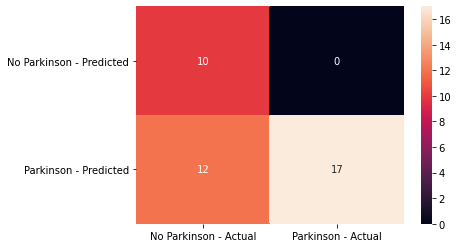

In [208]:
confusionMatrix_GNB = confusion_matrix(y_test, y_predGNB)

xAxisLabels = ['No Parkinson - Actual', 'Parkinson - Actual']
yAxisLabels = ['No Parkinson - Predicted', 'Parkinson - Predicted']

ss.heatmap(confusionMatrix_GNB, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

### LR

In [209]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
y_predLR = modelLR.predict(x_test)
accuracyLR = metrics.accuracy_score(y_test, y_predLR)*100
print("Accuracy in LR Classifier : %.2f" % accuracyLR)

Accuracy in LR Classifier : 79.49


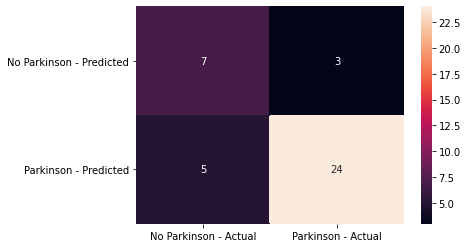

In [211]:
confusionMatrix_LR = confusion_matrix(y_test, y_predLR)

xAxisLabels = ['No Parkinson - Actual', 'Parkinson - Actual']
yAxisLabels = ['No Parkinson - Predicted', 'Parkinson - Predicted']

ss.heatmap(confusionMatrix_LR, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

### KNN

In [212]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [213]:
y_predKNN = modelKNN.predict(x_test)
accuracyKNN = metrics.accuracy_score(y_test, y_predKNN)*100
print("Accuracy in KNN Classifier : %.2f" % accuracyKNN)

Accuracy in KNN Classifier : 94.87


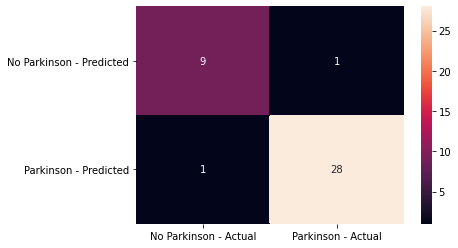

In [215]:
confusionMatrix_KNN = confusion_matrix(y_test, y_predKNN)

xAxisLabels = ['No Parkinson - Actual', 'Parkinson - Actual']
yAxisLabels = ['No Parkinson - Predicted', 'Parkinson - Predicted']

ss.heatmap(confusionMatrix_KNN, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

### SVM

In [216]:
from sklearn.svm import SVC

modelSVM = SVC(kernel = 'rbf')
modelSVM.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [217]:
y_predSVM = modelSVM.predict(x_test)
accuracySVM = metrics.accuracy_score(y_test, y_predSVM)*100
print("Accuracy in SVM Classifier : %.2f" % accuracySVM)

Accuracy in SVM Classifier : 92.31


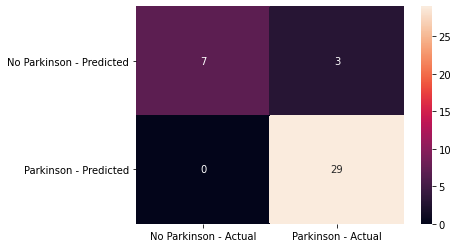

In [218]:
confusionMatrix_SVM = confusion_matrix(y_test, y_predSVM)

xAxisLabels = ['No Parkinson - Actual', 'Parkinson - Actual']
yAxisLabels = ['No Parkinson - Predicted', 'Parkinson - Predicted']

ss.heatmap(confusionMatrix_SVM, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

### DTC

In [219]:
from sklearn.tree import DecisionTreeClassifier

modelDTC = DecisionTreeClassifier(criterion = 'gini')
modelDTC.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [220]:
y_predDTC = modelDTC.predict(x_test)
accuracyDTC = metrics.accuracy_score(y_test, y_predDTC)*100
print("Accuracy in DTC Classifier : %.2f" % accuracyDTC)

Accuracy in DTC Classifier : 87.18


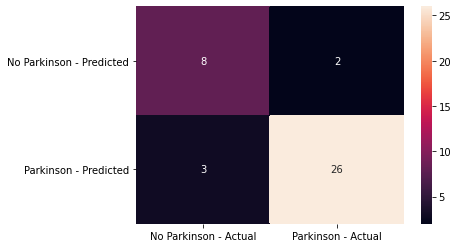

In [221]:
confusionMatrix_DTC = confusion_matrix(y_test, y_predDTC)

xAxisLabels = ['No Parkinson - Actual', 'Parkinson - Actual']
yAxisLabels = ['No Parkinson - Predicted', 'Parkinson - Predicted']

ss.heatmap(confusionMatrix_DTC, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

### RFC

In [222]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(n_estimators = 10, criterion = 'gini')
modelRFC.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
y_predRFC = modelRFC.predict(x_test)
accuracyRFC = metrics.accuracy_score(y_test, y_predRFC)*100
print("Accuracy in RFC Classifier : %.2f" % accuracyRFC)

Accuracy in RFC Classifier : 89.74


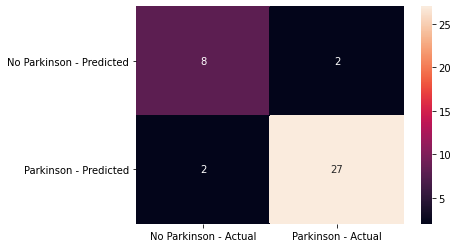

In [224]:
confusionMatrix_RFC = confusion_matrix(y_test, y_predRFC)

xAxisLabels = ['No Parkinson - Actual', 'Parkinson - Actual']
yAxisLabels = ['No Parkinson - Predicted', 'Parkinson - Predicted']

ss.heatmap(confusionMatrix_RFC, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

### ANN

In [234]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=16, activation='relu', input_shape=(22,)))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )
classifier.fit(x_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
156/156 [==============================] - 0s 895us/step - loss: 0.7210 - accuracy: 0.5385
Epoch 2/100
156/156 [==============================] - 0s 872us/step - loss: 0.5146 - accuracy: 0.7436
Epoch 3/100
156/156 [==============================] - 0s 841us/step - loss: 0.4336 - accuracy: 0.8205
Epoch 4/100
156/156 [==============================] - 0s 819us/step - loss: 0.3786 - accuracy: 0.8462
Epoch 5/100
156/156 [==============================] - 0s 819us/step - loss: 0.3389 - accuracy: 0.8654
Epoch 6/100
156/156 [==============================] - 0s 834us/step - loss: 0.3113 - accuracy: 0.8910
Epoch 7/100
156/156 [==============================] - 0s 908us/step - loss: 0.2875 - accuracy: 0.8846
Epoch 8/100
156/156 [==============================] - 0s 871us/step - loss: 0.2705 - accuracy: 0.8974
Epoch 9/100
156/156 [==============================] - 0s 876us/step - loss: 0.2571 - accuracy: 0.9103
Epoch 10/100
156/156 [==============================] - 0s 869us/step - l

In [249]:
print("Evaluate on test data")
results = classifier.evaluate(x_test, y_test, batch_size=1)

testLossANN = results[0]*100
print("Test Loss : %.2f" % testLossANN)

accuracyANN = results[1]*100
print("Test Accuracy : %.2f" % accuracyANN)

Evaluate on test data
39/39 [==============================] - 0s 771us/step - loss: 0.3246 - accuracy: 0.9231
Test Loss : 32.46
Test Accuracy : 92.31


In [250]:
y_predicted = classifier.predict(x_test)
y_predicted = (y_predicted > 0.5)

from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(y_test, y_predicted)

identificationCorrect = confusionMatrix[0,0] + confusionMatrix[1,1]
identificationIncorrect = confusionMatrix[0,1] + confusionMatrix[1,0]
Identification = identificationCorrect + identificationIncorrect

print('Total Test Samples : ', Identification)
print('Correctly Detected : ', identificationCorrect)
print('Incorrectly Detected : ', identificationIncorrect)

Total Test Samples :  39
Correctly Detected :  36
Incorrectly Detected :  3


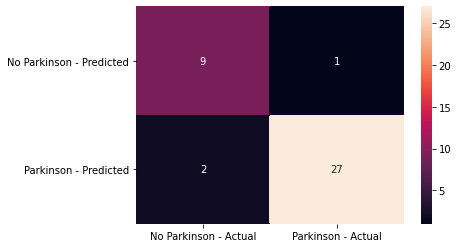

In [251]:
import seaborn as ss

xAxisLabels = ['No Parkinson - Actual', 'Parkinson - Actual']
yAxisLabels = ['No Parkinson - Predicted', 'Parkinson - Predicted']

ss.heatmap(confusionMatrix, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

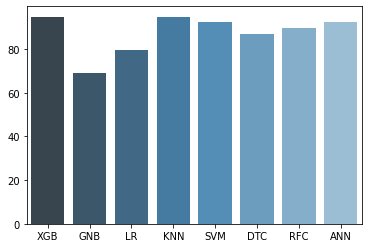

In [284]:
xAxis = ['XGB', 'GNB', 'LR', 'KNN', 'SVM', 'DTC', 'RFC', 'ANN' ]
yAxis = [accuracyXGB, accuracyGNB, accuracyLR, accuracyKNN, accuracySVM, accuracyDTC, accuracyRFC, accuracyANN]

accuracyMean = [ np.mean(yAxis) for i in range(len(yAxis))]

ss.barplot(xAxis, yAxis, palette="Blues_d", linewidth=1)

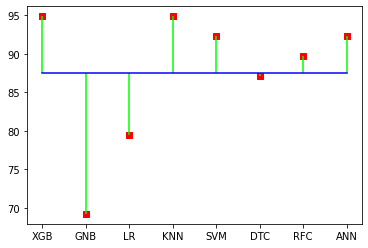

In [285]:
plt.scatter(xAxis, yAxis, c ='red', marker= 's')
plt.plot(xAxis, accuracyMean, c = 'Blue')
plt.vlines(xAxis, yAxis, accuracyMean, colors = 'lime')